In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load dataset
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [ ]:
# Cek missing value
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Cek Duplikat
df.duplicated().sum()

0

In [ ]:
# Cek Data Type
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
# Ubah TotalCharges Ke float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Karena tedapat nilai null pada TotalCharges setelah tipe datanya diubah makan nilai null tersebut perlu di drop
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# Exploratory Data Analysis (EDA)

In [ ]:
# Melihat ringkasan statistik dari semua kolom
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


## Analisis Univariat

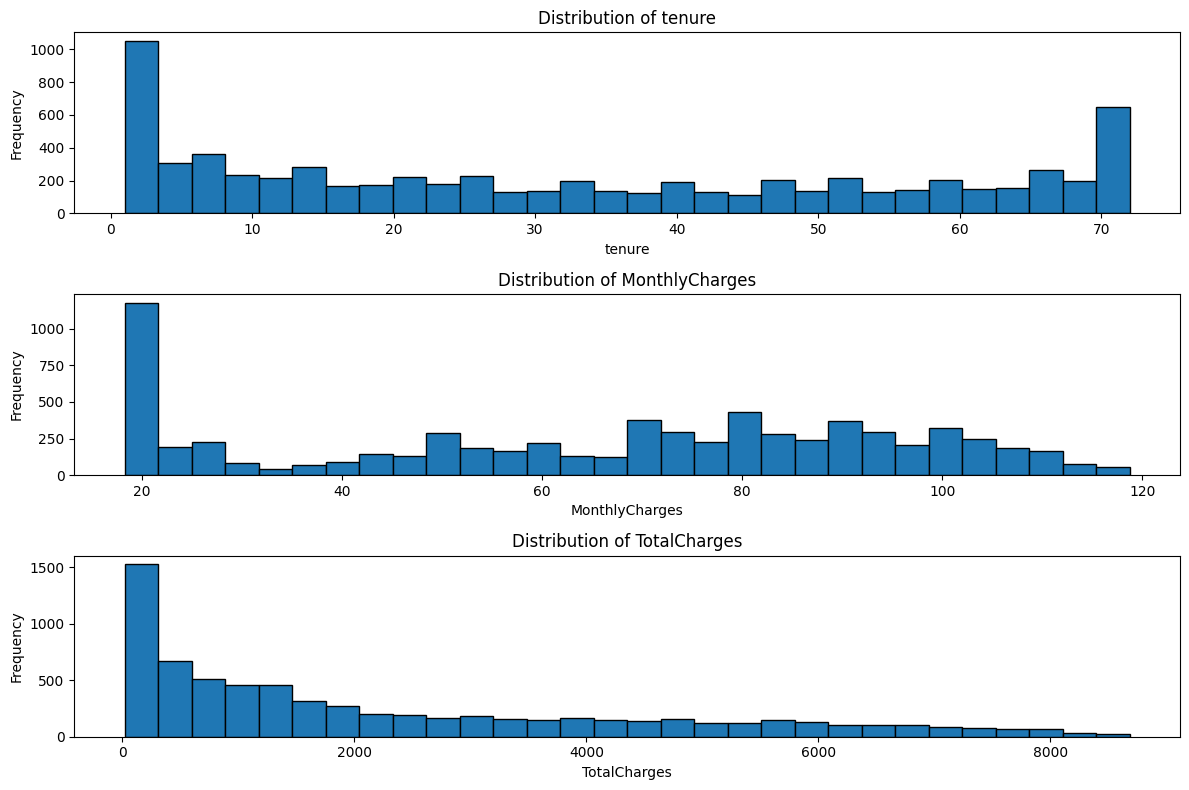

In [ ]:
# Membuat histogram untuk variabel numerik
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 1, i)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Di atas adalah histogram distribusi dari variabel numerik:

1. Tenure: Distribusi lama berlangganan menunjukkan banyak pelanggan memiliki lama berlangganan yang bervariasi, dengan puncak di sekitar pelanggan yang baru saja bergabung (tenure rendah) serta pelanggan yang sudah berlangganan selama bertahun-tahun (tenure tinggi).

2. MonthlyCharges: Distribusi tagihan bulanan menunjukkan variasi tagihan yang cukup lebar, dengan puncak di sekitar $20 hingga $40 dan penurunan jumlah pelanggan dengan tagihan yang lebih tinggi.

3. TotalCharges: Distribusi total tagihan terlihat mirip dengan tenure, karena total tagihan cenderung meningkat seiring dengan lama pelanggan berlangganan.

In [ ]:
# Daftar kolom kategori yang ingin dianalisis
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']

# Membagi daftar kolom menjadi tiga bagian
split1 = len(categorical_columns) // 3
split2 = 2 * (len(categorical_columns) // 3)

# Fungsi untuk menambahkan jumlah value untuk setiap bar chart
def plot_with_values(col, subplot_position):
    values = df[col].value_counts()
    colors = plt.cm.Paired(range(len(values)))  # Menggunakan colormap untuk memberikan warna berbeda
    bars = values.plot(kind='bar', edgecolor='black', color=colors)

    # Menambahkan nilai di dalam bar dengan sedikit jarak di bawah puncak bar
    for bar in bars.patches:
        bars.annotate(f'{int(bar.get_height())}',
                      xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='top', fontsize=10, color='white',
                      xytext=(0, -5), textcoords='offset points')  # Menambahkan offset ke dalam bar

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')

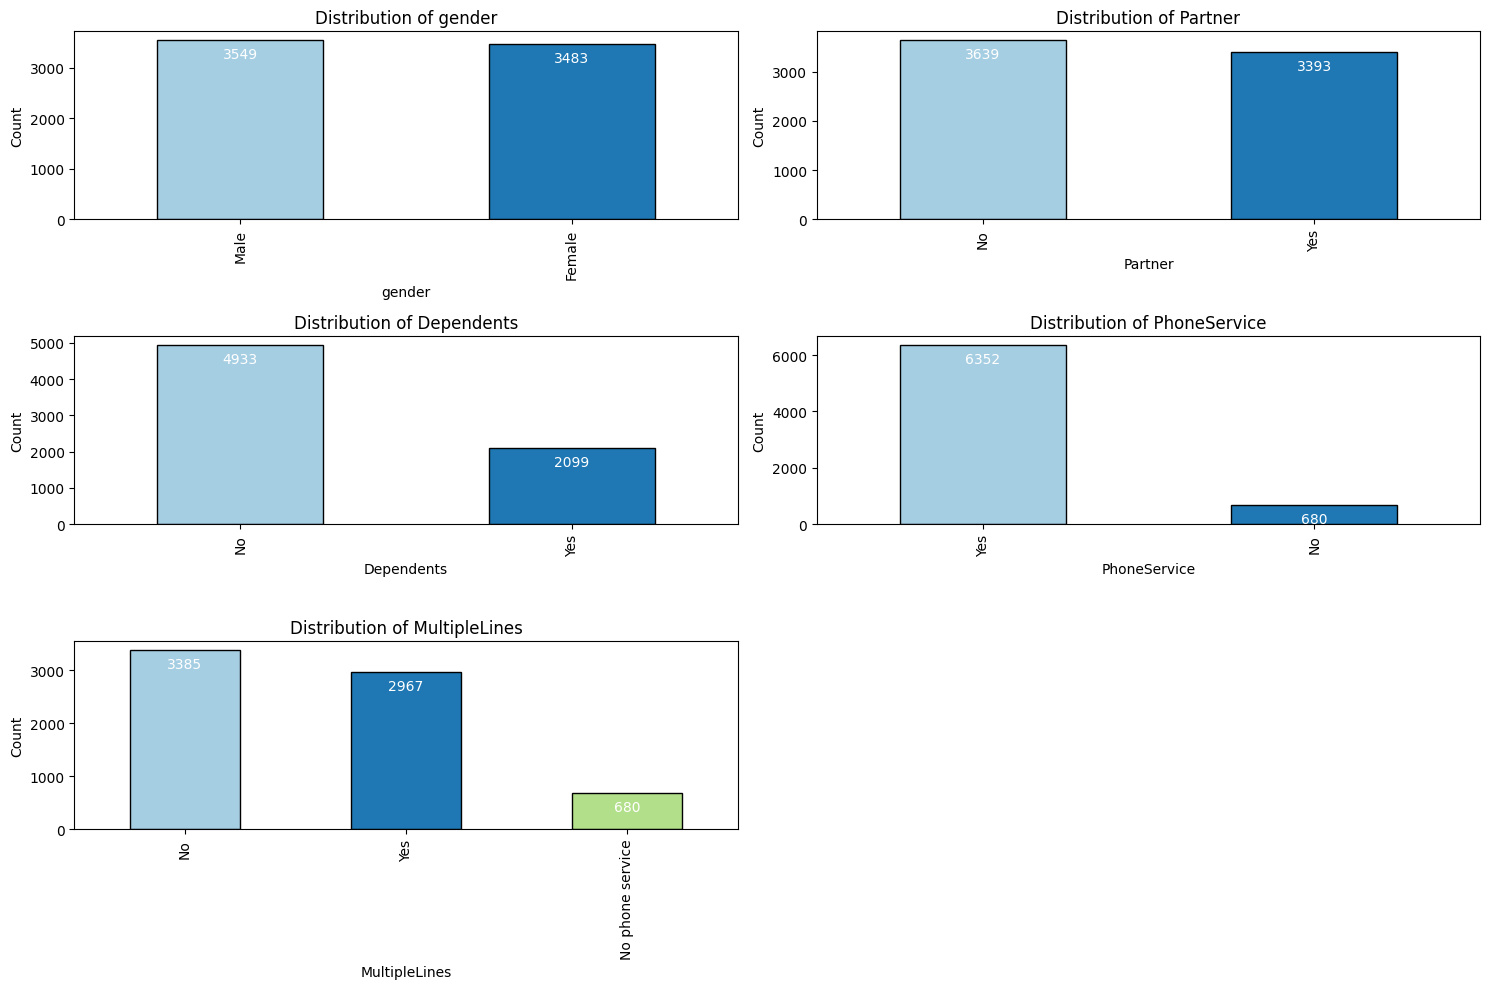

In [ ]:
# Plot pertama (untuk set pertama kolom kategori)
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns[:split1], 1):
    plt.subplot(3, 2, i)
    plot_with_values(col, i)

plt.tight_layout()
plt.show()

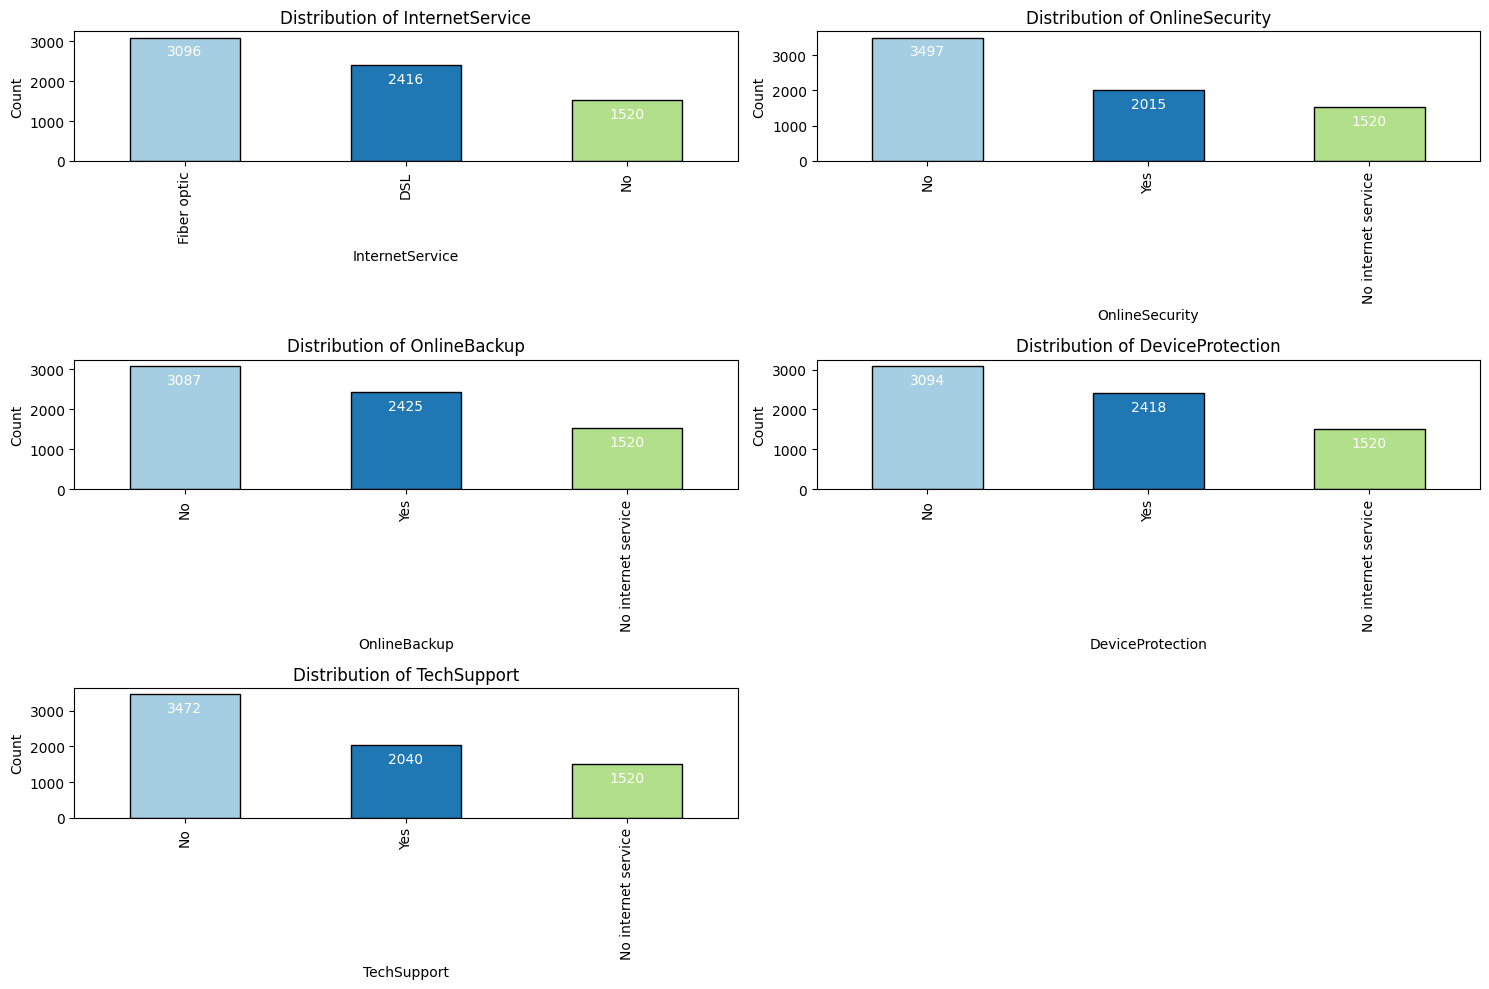

In [ ]:
# Plot kedua (untuk set kedua kolom kategori)
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns[split1:split2], 1):
    plt.subplot(3, 2, i)
    plot_with_values(col, i)

plt.tight_layout()
plt.show()

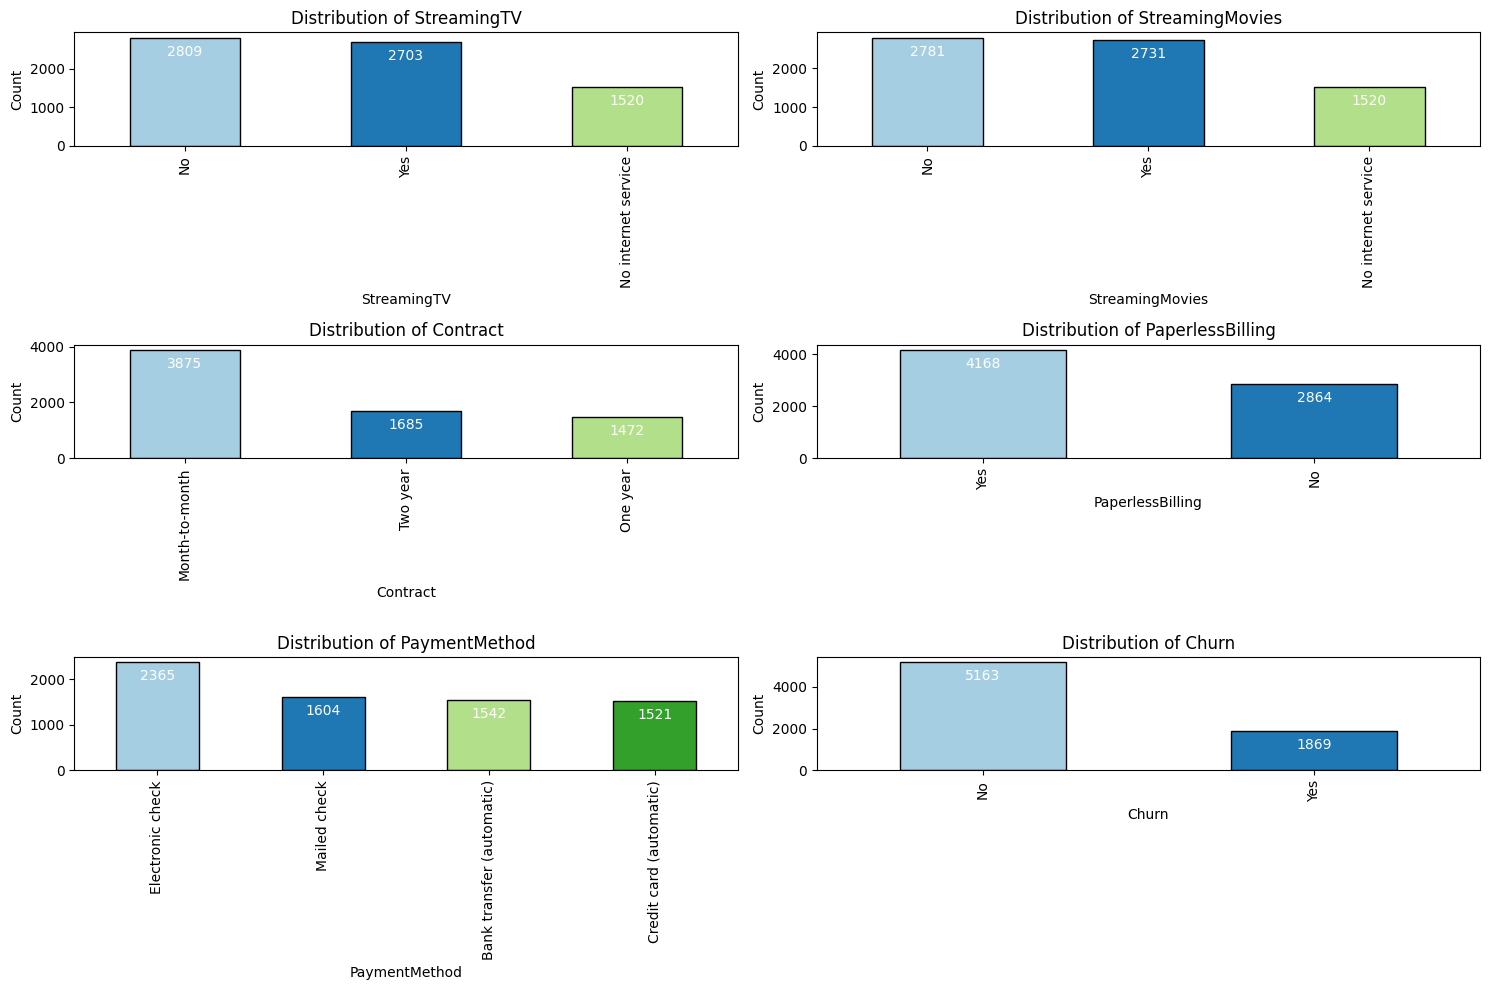

In [ ]:
# Plot ketiga (untuk set ketiga kolom kategori)
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns[split2:], 1):
    plt.subplot(3, 2, i)
    plot_with_values(col, i)

plt.tight_layout()
plt.show()

Dari bar chart yang ditampilkan, kita dapat melihat distribusi data pada setiap kolom kategorikal. Misalnya, pada kolom gender, distribusi antara pria dan wanita hampir seimbang. Untuk kolom Partner dan Dependents, sebagian besar pelanggan tidak memiliki pasangan maupun tanggungan. Pada kolom PhoneService, mayoritas pelanggan memiliki layanan telepon. Hal serupa juga terlihat pada kolom MultipleLines, di mana sebagian besar pelanggan tidak memiliki layanan telepon ganda. Distribusi ini membantu kita memahami bagaimana masing-masing kategori tersebar di dalam dataset, yang bisa memberikan wawasan awal mengenai pola-pola dalam data yang mungkin mempengaruhi perilaku pelanggan, seperti churn.

## Analisis Multivariat

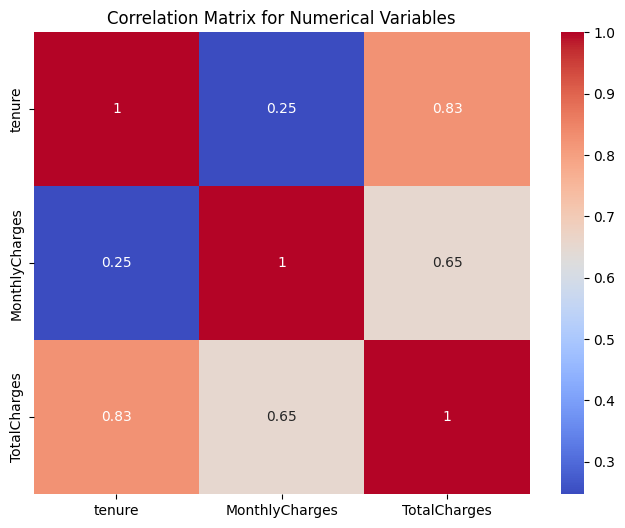

In [ ]:
# Korelasi antar variabel numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

1. Korelasi antara Tenure dan TotalCharges: Nilai korelasinya sebesar 0.83, yang berarti ada hubungan positif yang kuat antara lama pelanggan berlangganan (tenure) dan total tagihan yang mereka bayar (TotalCharges). Artinya, semakin lama pelanggan berlangganan, semakin tinggi total tagihan mereka.

2. Korelasi antara MonthlyCharges dan TotalCharges: Nilai korelasinya adalah 0.65, yang juga menunjukkan hubungan positif. Ini logis karena pelanggan dengan biaya bulanan yang lebih tinggi secara alami akan memiliki total tagihan yang lebih besar.

3. Korelasi antara Tenure dan MonthlyCharges: Nilai korelasinya 0.25, yang cukup rendah. Ini menunjukkan bahwa tenure (lama berlangganan) dan MonthlyCharges (biaya bulanan) tidak terlalu terkait secara linier. Artinya, pelanggan dengan biaya bulanan yang tinggi atau rendah bisa jadi memiliki lama berlangganan yang bervariasi.

Kesimpulan:
* Tenure memiliki korelasi yang kuat dengan TotalCharges, yang berarti pelanggan yang bertahan lebih lama cenderung memiliki total pembayaran yang lebih besar.
* MonthlyCharges juga memiliki korelasi cukup kuat dengan TotalCharges, tetapi korelasinya dengan tenure lebih lemah, yang menunjukkan bahwa biaya bulanan tidak selalu berkaitan langsung dengan lama berlangganan pelanggan.

Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1306      1637
Yes                 1655       166        48


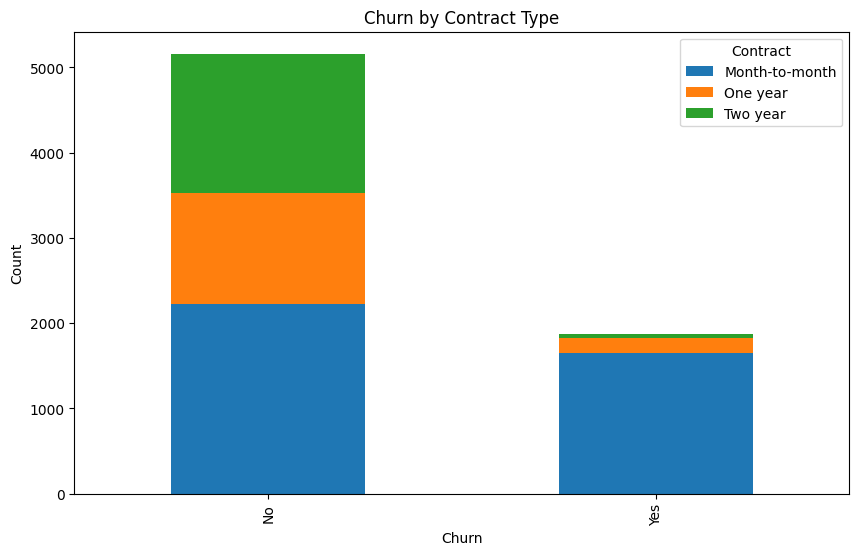

In [ ]:
# Crosstab antara Churn dan Contract
contract_churn = pd.crosstab(df['Churn'], df['Contract'])
print(contract_churn)

# Visualisasi
contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn by Contract Type')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

* Mayoritas pelanggan yang churn berada pada kategori kontrak month-to-month. Ini bisa mengindikasikan bahwa pelanggan dengan kontrak bulanan lebih fleksibel untuk berhenti berlangganan kapan saja, sehingga cenderung lebih tinggi tingkat churn-nya dibandingkan jenis kontrak lain.
* Sebagian kecil pelanggan churn memiliki kontrak satu tahun. Ini menunjukkan bahwa pelanggan yang terikat kontrak tahunan memiliki komitmen yang lebih besar dan lebih kecil kemungkinannya untuk churn dibandingkan pelanggan dengan kontrak bulanan.
* Kontrak dua tahun memiliki tingkat churn yang paling rendah. Pelanggan yang terikat dalam kontrak jangka panjang cenderung lebih stabil dan lebih kecil kemungkinan untuk berhenti.
* Pelanggan dengan kontrak bulanan perlu menjadi fokus utama dalam strategi retensi pelanggan. Perusahaan dapat menawarkan insentif atau diskon untuk mengajak mereka pindah ke kontrak tahunan atau dua tahunan, karena jenis kontrak ini tampaknya mengurangi kemungkinan churn.

## Deep Dive

### Soal 1
Apakah pelanggan dengan biaya bulanan yang lebih tinggi cenderung lebih sering churn?
- Pelanggan dengan biaya bulanan yang tinggi mungkin merasa terbebani dan lebih cenderung berhenti berlangganan. Kita akan memeriksa distribusi MonthlyCharges berdasarkan churn.

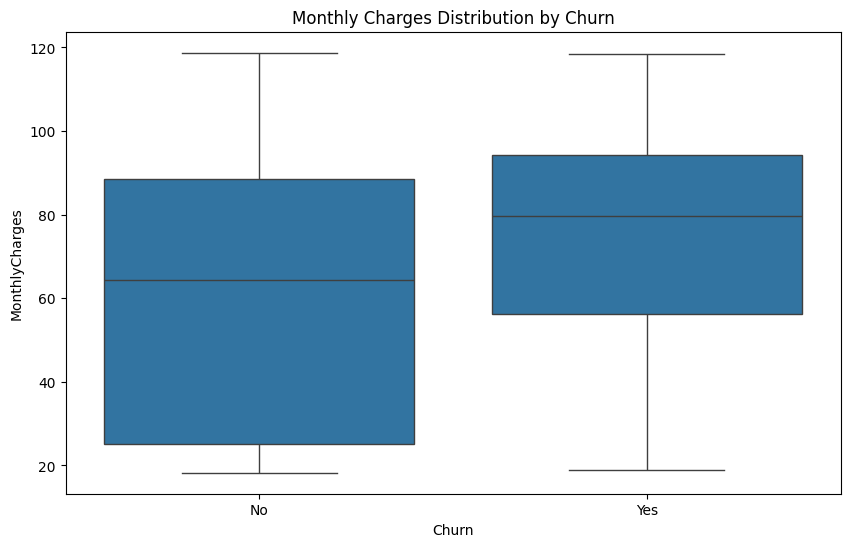

        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
No     5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35


In [ ]:
# Boxplot untuk MonthlyCharges berdasarkan churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

# Menghitung ringkasan statistik untuk MonthlyCharges berdasarkan churn
churn_stats = df.groupby('Churn')['MonthlyCharges'].describe()
print(churn_stats)

* Pelanggan dengan biaya bulanan yang lebih tinggi cenderung lebih sering churn. Ini terlihat jelas dari perbedaan rata-rata dan median MonthlyCharges antara kedua kelompok.
* Faktor biaya bulanan mungkin menjadi salah satu pemicu churn, dan perusahaan bisa mempertimbangkan strategi pricing yang lebih kompetitif untuk mengurangi churn di segmen pelanggan dengan biaya bulanan yang lebih tinggi.

### Soal 2
Bagaimana pengaruh layanan internet (DSL, Fiber optic, atau No Internet) terhadap churn?

Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


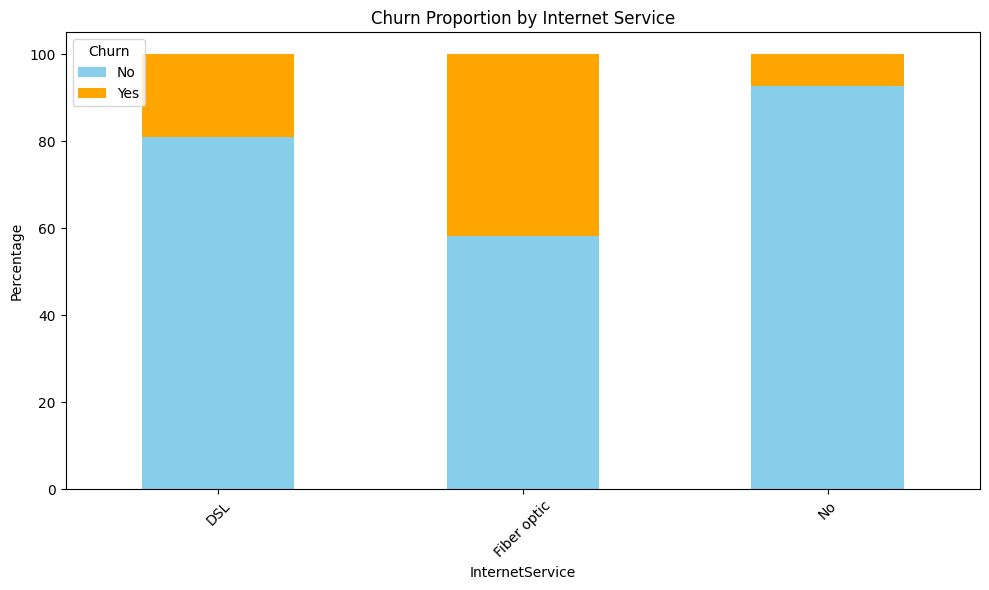

In [ ]:
# Menghitung proporsi churn berdasarkan jenis layanan internet
internet_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
print(internet_churn)

# Visualisasikan hasil dengan bar chart
internet_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Churn Proportion by Internet Service')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Layanan Fiber optic memiliki tingkat churn yang jauh lebih tinggi dibandingkan dengan DSL dan pelanggan tanpa internet. Hal ini bisa menjadi area fokus bagi perusahaan untuk meningkatkan layanan atau menawarkan insentif khusus bagi pelanggan Fiber optic untuk mengurangi churn.
* DSL tampaknya lebih stabil dalam mempertahankan pelanggan dibandingkan Fiber optic.
* Pelanggan yang tidak menggunakan layanan internet memiliki tingkat churn yang paling rendah, mungkin karena mereka hanya menggunakan layanan dasar seperti telepon.

### Soal 3
Apakah metode pembayaran tertentu meningkatkan kemungkinan churn?

<Figure size 1000x600 with 0 Axes>

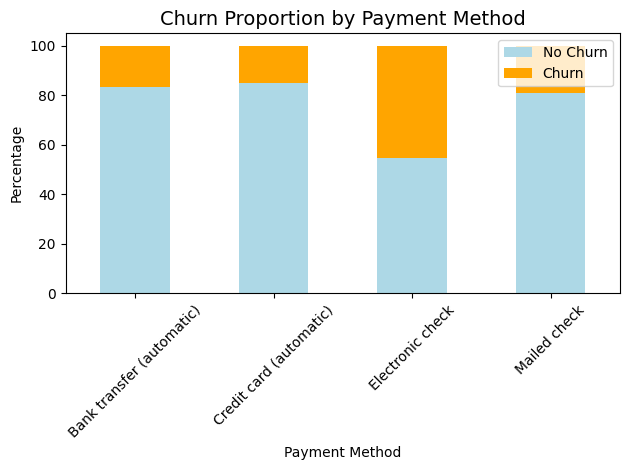

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


In [ ]:
# Membuat tabel kontingensi untuk melihat distribusi churn berdasarkan PaymentMethod
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

# Plot proporsi churn berdasarkan metode pembayaran
plt.figure(figsize=(10, 6))
payment_churn.plot(kind='bar', stacked=True, color=['lightblue', 'orange'])
plt.title('Churn Proportion by Payment Method', fontsize=14)
plt.ylabel('Percentage')
plt.xlabel('Payment Method')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan tabel persentase churn untuk setiap metode pembayaran
payment_churn

* Electronic check memiliki korelasi kuat dengan churn. Pelanggan yang menggunakan metode pembayaran ini cenderung churn lebih sering daripada pelanggan yang menggunakan metode otomatis. Ini mungkin disebabkan oleh kemudahan yang lebih rendah dalam pembayaran, atau pelanggan yang menggunakan metode ini cenderung kurang loyal.
Metode otomatis, seperti bank transfer dan credit card, tampaknya lebih stabil dan membantu mengurangi churn, karena pelanggan tidak perlu repot dengan proses pembayaran manual.
* Perusahaan dapat mempertimbangkan untuk menawarkan insentif kepada pelanggan yang saat ini menggunakan electronic check atau mailed check agar beralih ke metode otomatis, yang tampaknya lebih efektif dalam mengurangi churn.
Bisa juga dilakukan investigasi lebih lanjut mengenai mengapa pelanggan dengan electronic check cenderung lebih banyak churn, mungkin terkait dengan pengalaman pengguna yang buruk atau kesulitan dalam menggunakan metode tersebut.